In [1]:
import numpy as np
import pandas as pd
import os
from glob import glob
from pprint import pprint
import json
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.pyplot as plt

import cellcycle.PlottingTools as plottingTools
from cellcycle.ParameterSet import ParameterSet
import cellcycle.DataStorage as dataStorage
import cellcycle.DataAnalysis as dataAnalysis
import cellcycle.MakeDataframe as makeDataframe
from cellcycle import mainClass

The following lines need to be used if data the from downloaded dataset should be used. The location of the ``Data`` folder needs to be specified by the parameter ``DATA_FOLDER_PATH`` in the file ``input_params.json``. 

If you want to analyse your own dataset you need to set the variable ``file_path`` to the folder where the simulation is located. Importantly, in this folder there should only be located exactly one simulation.

In [2]:
file_path_input_params_json = '../input_params.json'
input_param_dict = mainClass.extract_variables_from_input_params_json(file_path_input_params_json)
root_path = input_param_dict["DATA_FOLDER_PATH"]
simulation_location = 'fig_1'
file_path = os.path.join(root_path, simulation_location)
print('file_path', file_path)
parameter_path = os.path.join(file_path, 'parameter_set.csv')
print('parameter_path', parameter_path)

file_path /home/berger/Data/UltrasensitivityCombined/Final_NatCom_Submission/fig_1
parameter_path /home/berger/Data/UltrasensitivityCombined/Final_NatCom_Submission/fig_1/parameter_set.csv


# Make data frame from time traces

In [3]:
data_frame = makeDataframe.make_dataframe(file_path)
time_traces_data_frame = pd.read_hdf(data_frame['path_dataset'].iloc[0], key='dataset_time_traces')

v_init_data_frame = pd.read_hdf(data_frame['path_dataset'].iloc[0], key='dataset_init_events')
v_init = v_init_data_frame.iloc[0]['v_init']
v_init

['/home/berger/Data/UltrasensitivityCombined/Final_NatCom_Submission/fig_1/fig1_higher.pdf',
 '/home/berger/Data/UltrasensitivityCombined/Final_NatCom_Submission/fig_1/fig_1.pdf',
 '/home/berger/Data/UltrasensitivityCombined/Final_NatCom_Submission/fig_1/fig1_longer.pdf',
 '/home/berger/Data/UltrasensitivityCombined/Final_NatCom_Submission/fig_1/general_growth_law_fig1',
 '/home/berger/Data/UltrasensitivityCombined/Final_NatCom_Submission/fig_1/fig_1.svg']


1.2888153602145769

In [4]:
n_ori = np.array(time_traces_data_frame["n_ori"])
time = np.array(time_traces_data_frame["time"])
volume = np.array(time_traces_data_frame["volume"])
n_ori_density = n_ori / volume

# Color definitions

In [5]:
pinkish_red = (247 / 255, 109 / 255, 109 / 255)
green = (0 / 255, 133 / 255, 86 / 255)
dark_blue = (36 / 255, 49 / 255, 94 / 255)
light_blue = (168 / 255, 209 / 255, 231 / 255)
blue = (55 / 255, 71 / 255, 133 / 255)
yellow = (247 / 255, 233 / 255, 160 / 255)

# Plot three figures

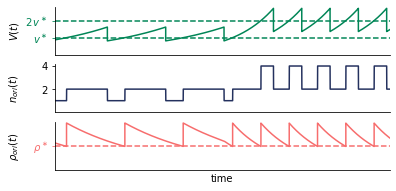

In [7]:
label_list = [r'$V(t)$', r'$n_{ori}(t)$', r'$\rho_{ori}(t)$']
x_axes_list = [time, time, time]
y_axes_list = [volume, n_ori, n_ori_density]
color_list = [green, dark_blue, pinkish_red]
fig, ax = plt.subplots(3, figsize=(6,3))
plt.xlabel('time')
for item in range(0, len(label_list)):
    ax[item].set_ylabel(label_list[item])
    ax[item].plot(x_axes_list[item], y_axes_list[item], color=color_list[item])
    ax[item].set_ylim(ymin=0)
    ax[item].tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False) # labels along the bottom edge are off
    ax[item].spines["top"].set_visible(False)
    ax[item].spines["right"].set_visible(False)
    ax[item].margins(0)
ax[0].set_yticks([v_init, 2*v_init])
ax[0].set_yticklabels([ r'$v^\ast$', r'$2 \, v^\ast$'])
ax[0].tick_params(axis='y', colors=green)
ax[0].axhline(y=v_init, color=green, linestyle='--')
ax[0].axhline(y=2*v_init, color=green, linestyle='--')

ax[1].set_yticks([2, 4])
ax[1].set_yticklabels([ r'2', r'4'])
ax[2].axhline(y=1/v_init, color=pinkish_red, linestyle='--')
ax[2].set_yticks([1/v_init])
ax[2].set_yticklabels([ r'$\rho^\ast$'])
ax[2].tick_params(axis='y', colors=pinkish_red)
fig.align_ylabels()
plt.savefig(file_path + '/fig1_higher.pdf', format='pdf')